In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

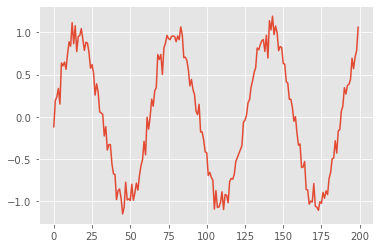

In [3]:
# make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1    # 0.1 is angular frequency

# plot it
plt.plot(series)
plt.show()

In [4]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10    # which means we going to use 10 previous timestamps to predict the next timestamps
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [5]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 61ms/step - loss: 0.2449 - val_loss: 0.2492
Epoch 2/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1361 - val_loss: 0.0697
Epoch 3/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1538 - val_loss: 0.0554
Epoch 4/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0440 - val_loss: 0.0909
Epoch 5/80
3/3 [==============================] - 0s 9ms/step - loss: 0.1108 - val_loss: 0.0333
Epoch 6/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0404 - val_loss: 0.0822
Epoch 7/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0723 - val_loss: 0.0275
Epoch 8/80
3/3 [==============================] - ETA: 0s - loss: 0.023 - 0s 9ms/step - loss: 0.0314 - val_loss: 0.0497
Epoch 9/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0476 - val_loss: 0.0221
Epoch 10/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0260 - val_loss: 0.0352
Epoch 11/80
3

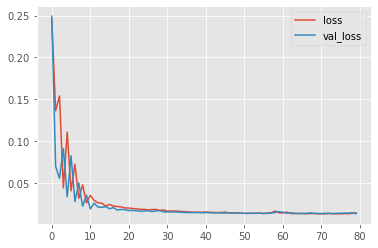

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

"Wrong" forecast using true targets

In [7]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
    i += 1

    # update the predictions list
    validation_predictions.append(p)

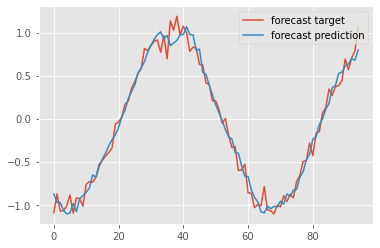

In [8]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

Forecast future values (use only self-predictions for making future predictions)

In [9]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

    # update the predictions list
    validation_predictions.append(p)

    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

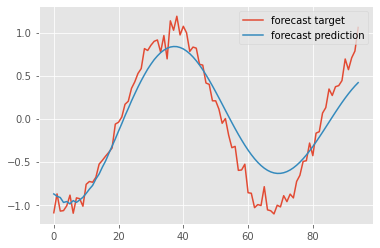

In [10]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()